<a href="https://colab.research.google.com/github/pabloiarriola/Mini2-ModSim/blob/master/Mini2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini2
por: \\
Santiago Paiz 15849 \\
Pablo Ariola

In [0]:
import numpy as np                    # nos ayuda a hacer funciones matematicas mas simple
import matplotlib.pyplot as plt       # Ayuda a graficar
import random                         # libreria Random para ayudar
import sys
import math
from numpy.random import normal, uniform
from math import log
import warnings
warnings.filterwarnings('ignore')

## Ejercicio 1 – Función acumulada ponderada

$$F(x) = \sum_{i=1}^{n} p_iF_i(x)$$
Tasks: \\
● Describa un algoritmo para generar V \\
● Demuestre que el algoritmo genera adecuadamente V

## a.) <br>

1. Con esto se puede generar un index I en la cual P(I = i) = $p_i$ para i = 1, 2, ... <br>
2. Ya con esto se puede generar la variable aleatoria V con la funcion de distribucion $F_I$

## b.)


Probamos utilizar $f = \sum{p_if_i}$ para encontrar una funcion que tenga el mismo comportambiento 
$$f(x) = \sum{p_if_i}$$
$$\int f(x) = \int \sum{p_if_i}$$
$$F(x) = \sum{p_i \int f_i} = \sum p_iF_i(x)$$


Ya que comprobamos que esta funcion tiene el mismo comportamiento buscamos encontrar una variable aleatoria X para la funcion F(x)

Ya que X ~ F, substituimos:
$$X = \sum p_i X_i$$
ahora x buscamos otra variable aleatoria
$$F(\mu) = X$$
$$X = P_0 \cup() + P_1 N()$$
$$$$

## Ejercicio 2 – Función acumulada ponderada

Para resolver: $$f(x) = \frac{5}{12}(1+(x-1)^4), \qquad 0 \le x \le 2$$
lo separamos a:
$$f(x) = \sum p_i f_i$$
siempre tomando en cuenta que $\sum_1^n p_i = 1$ y que no puede ser 0.
si tenemos:
$$p_1 = \frac{5}{6}, \quad f_1=\frac{1}{2}, \quad p_2 = \frac{1}{6}, \quad f_2 = \frac{5}{2}(x-1)^4$$
y utilizando el motodo de composicion:
$$f_1(x) = \frac{1}{2} \rightarrow F_1(x) = \int f_1(x) = \frac{x}{2} = u \rightarrow x = 2u$$
$$f_2(x) = \frac{5}{2}(x-4)^4 \rightarrow F_2(x) = \int f_2(x) = \frac{1}{2}+\frac{1}{2}(x-1)^5 = u \rightarrow x = \sqrt[5]{2u-1}$$

In [0]:
solucion_f1 = lambda u: 2*u
solucion_f2 = lambda u: (2*u - 1) ** (1/5)

In [0]:
def generador(n):
    # Creamos la lista de probabilidades
    lista_de_val_aleatorios = []
    for x in range(n):
        lista_de_val_aleatorios.append((random.uniform(0,1), random.uniform(0,1))) 
        
    valores = []
    for u in lista_de_val_aleatorios:
        if u[0] < (5/6):
            valores.append(solucion_f1(u[1]))
        else:
            valores.append(solucion_f2(u[1]))
    return valores

In [0]:
resultados = generador(100)

(array([13.,  7., 15., 20., 10.,  4.,  7.,  8.,  8.,  8.]),
 array([0.02306411+0.j, 0.21879786+0.j, 0.41453162+0.j, 0.61026537+0.j,
        0.80599912+0.j, 1.00173288+0.j, 1.19746663+0.j, 1.39320038+0.j,
        1.58893413+0.j, 1.78466789+0.j, 1.98040164+0.j]),
 <a list of 10 Patch objects>)

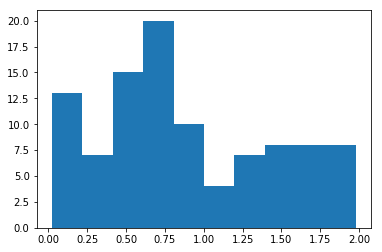

In [0]:
plt.hist(resultados)

# Ejercicio 3 – Valor presente neto

In [0]:
def uniform(mu2, sigma2):
    rango = sigma2 - mu2
    selection = np.random.uniform(0, 1)
    return mu2 + (rango*selection)


In [0]:

#Tomada de la presentacion 13. Simulando variables aleatorias continuas

def ylambda():
    U = uniform(0,1)
    X = -1 * log(U)
    return X
  
def normal(mu, sigma):
    while True:
        y1 = ylambda()
        y2 = ylambda()
        if y2 - (((y1-1)**2)/2) > 0:
            y = y2 - (((y1-1)**2)/2)
            U = uniform(0,1)
            if U <= 0.5:
                return mu + (sigma * y)
            else:
                return mu - (sigma * y)

In [0]:
def vpn():
    H0 =  -800
    C0 = -900
    interes = 0.10
    j = 0
    H1 = normal(-800,50)
    H2 = normal(-800,100)
    H3 = normal(-700,150)
    H4 = normal(300,200)
    H5 = normal(400,200)
    H6 = normal(500,200)
    H7 = uniform(200,8440)    
    hotel = np.array((H0,H1,H2,H3,H4,H5,H6,H7)) 
    
    C1 = normal(-600,50)
    C2 = normal(-200,50)
    C3 = normal(-600,100)
    C4 = normal(250,150)
    C5 = normal(350,150)
    C6 = normal(400,150)
    C7 = uniform(1600,6000)
    comercial = np.array((C0,C1,C2,C3,C4,C5,C6,C7))
    
    npvh = np.npv(interes,hotel)
    npvc = np.npv(interes,comercial)
    if npvh > npvc:
        j = 1
    return j

In [0]:
a2 = 0
for i in range(1,100):
    if vpn()== 1:
        a2 = a2 + 1
        
b2 = 0
for i in range(1,1000):
    if vpn()== 1:
        b2 = b2 + 1
        
c2 = 0
for i in range(1,10000):
    if vpn()== 1:
        c2 = c2 + 1
        
d2 = 0
for i in range(1,100000):
    if vpn()== 1:
        d2 = d2 + 1
        


In [136]:
print('Elejir entre proyecto de Hotel o Centro Comercial: \n')

if a2 >= 100/2:
    print('a. 1000 ejecuciones, con probabilidad de '+  format(a2/100*100,'.2f') +'%., invierta en proyecto del Hotel\n')
else:
    print('a. 1000 ejecuciones, con probabilidad de '+  format((100-a2)/100*100,'.2f') +'%., invierta en proyecto del Centro Comercial \n')

if b2 >= 1000/2:
    print('b. 1000 ejecuciones, con probabilidad de '+  format(b2/1000*100,'.2f') +'%., invierta en proyecto del Hotel\n')
else:
    print('b. 1000 ejecuciones, con probabilidad de '+  format((1000-b2)/1000*100,'.2f') +'%., invierta en proyecto del Centro Comercial\n')


if c2 >= 10000/2:
    print('c. 10000 ejecuciones, con probabilidad de '+  format(c2/10000*100,'.2f') +'%., invierta en proyecto del Hotel\n')
else:
    print('c. 10000 ejecuciones, con probabilidad de '+  format((10000-c2)/10000*100,'.2f') +'%., invierta en proyecto del Centro Comercial\n')


if d2 >= 100000/2:
    print('d. 100000 ejecuciones, con probabilidad de '+  format(d2/100000*100,'.2f') +'%., invierta en proyecto del Hotel\n')
else:
    print('d. 100000 ejecuciones, con probabilidad de '+  format((100000-d2)/100000*100,'.2f') +'%., invierta en proyecto del Centro Comercial\n')

Elejir entre proyecto de Hotel o Centro Comercial: 

a. 1000 ejecuciones, con probabilidad de 51.00%., invierta en proyecto del Hotel

b. 1000 ejecuciones, con probabilidad de 56.30%., invierta en proyecto del Centro Comercial

c. 10000 ejecuciones, con probabilidad de 55.67%., invierta en proyecto del Centro Comercial

d. 100000 ejecuciones, con probabilidad de 56.20%., invierta en proyecto del Centro Comercial



## Conclusion
La mejor eleccion para hacer la inversion es el Centro Comercial

# Ejercicio 4 – Repartidor de periódicos

In [0]:
def resultadoPrint(ganancia, perdida):
    ''' Impirme a pantalla las ganancias y perdidas que se le mandan en el parametro'''
    print('Ganancia: {}'.format(ganancia))
    print('Perdida: {}'.format(perdida))
    print('Ganancia Neta = {}'.format(ganancia - perdida))

In [0]:
def simulacion(tiempos, chance, opciones):
    for tiempo in tiempos:
        print('')
        print('=== SIMULACION SOBRE {} DIAS ==='.format(tiempo))
        todos_pedidos = []

        contador_9 = 0
        contador_10 = 0
        contador_11 = 0
        
        for x in range(tiempo):
            pedido = random.choice(chance)
            todos_pedidos.append(pedido)
            if pedido == 9:
                contador_9 += 1
            if pedido == 10:
                contador_10 += 1
            if pedido == 11:
                contador_11 += 1
        
        print('[[ 9: {}, 10: {}, 11: {} ]]'.format(contador_9,contador_10, contador_11))
                
        for cantidad_de_perdiodico_elegido in opciones:
            ganancia = 0
            perdida = 0
            for pedidos in todos_pedidos:
                cantidad_de_periodicos_sobraron = (cantidad_de_perdiodico_elegido - pedidos) # cuestan 1.5 pero se rembolsan 0.5
                
                if cantidad_de_periodicos_sobraron > 0:
                    perdida += abs(cantidad_de_periodicos_sobraron) * (1) 
                    ganancia += pedidos
                elif cantidad_de_periodicos_sobraron < 0:
                    ganancia += cantidad_de_perdiodico_elegido
                else:
                    ganancia += cantidad_de_perdiodico_elegido

            print('=== Comprando {} al dia ==='.format(cantidad_de_perdiodico_elegido))
            resultadoPrint(ganancia, perdida)

In [0]:
tiempos = [30, 365, (365*10)]            # 30 dias, 365 dias y 10 anios (365*10)
chance = [9,9,9, 10,10,10,10 , 11,11,11] # 9-30% 10-40% 11-30% 
opciones = [9,10,11]                     # las opciones que se puede elegir
simulacion(tiempos,chance, opciones)


=== SIMULACION SOBRE 30 DIAS ===
[[ 9: 9, 10: 8, 11: 13 ]]
=== Comprando 9 al dia ===
Ganancia: 270
Perdida: 0
Ganancia Neta = 270
=== Comprando 10 al dia ===
Ganancia: 291
Perdida: 9
Ganancia Neta = 282
=== Comprando 11 al dia ===
Ganancia: 304
Perdida: 26
Ganancia Neta = 278

=== SIMULACION SOBRE 365 DIAS ===
[[ 9: 94, 10: 170, 11: 101 ]]
=== Comprando 9 al dia ===
Ganancia: 3285
Perdida: 0
Ganancia Neta = 3285
=== Comprando 10 al dia ===
Ganancia: 3556
Perdida: 94
Ganancia Neta = 3462
=== Comprando 11 al dia ===
Ganancia: 3657
Perdida: 358
Ganancia Neta = 3299

=== SIMULACION SOBRE 3650 DIAS ===
[[ 9: 1076, 10: 1460, 11: 1114 ]]
=== Comprando 9 al dia ===
Ganancia: 32850
Perdida: 0
Ganancia Neta = 32850
=== Comprando 10 al dia ===
Ganancia: 35424
Perdida: 1076
Ganancia Neta = 34348
=== Comprando 11 al dia ===
Ganancia: 36538
Perdida: 3612
Ganancia Neta = 32926


## Conclusion
El mejor resultado salio comprando 10 periodicos diarios. En las 3 opciones salio con la ganancia neta mas grande.